## Exercices XP : W4_D1

#### Part 1 – Machine Learning Foundations

##### Exercise 1: Type of Learning

Stock Price Prediction : Supervised Learning

The goal is to predict a specific numerical value (the stock price) based on historical data. There are known labels (actual prices) used to train the model.

Library Organization : Unsupervised Learning

The objective is to automatically discover groupings (clusters) without predefined labels. The model organizes books by similarity.

Vacuum Cleaning Robot : Reinforcement Learning

The robot learns through trial and error by interacting with its environment and adjusts its behavior to maximize a reward (cleaned areas) and avoid penalties (collisions).

##### Exercise 2: Action Plan for a Prediction Project

Model Objective: Predict whether a client will repay their bank loan or not, in order to help the bank make an informed decision.

Required Data (Features):
- Client age
- Monthly income
- Credit history
- Debt-to-income ratio
- Amount of the requested loan

Likely Data Sources:
- Loan application forms
- Internal banking records
- External credit data (credit rating agencies)
- Client transaction history
- Supporting documents provided (pay slips, proof of address)

##### Exercise 3: Evaluating Model Performance

Classification Model (loan prediction):

- Accuracy: Percentage of correct predictions overall.
- Recall: Percentage of bad payers correctly identified.
- Precision: Percentage of clients predicted as bad payers who truly are.

For the bank, a false positive (granting a loan to someone who defaults) is more serious than a false negative.
This results in a direct financial loss. Therefore, the bank will prefer a model with high precision, even if it means rejecting some reliable clients.

Clustering Model (book organization):

- Silhouette Score: Measures the consistency within clusters (items close within a cluster, distant between clusters).
- Elbow Method: Helps determine the optimal number of groups by analyzing intra-cluster inertia.

Reinforcement Model (vacuum robot):

- Average Cumulative Reward: If the robot receives better rewards over time, it is learning effectively.

# -------------------------------------------
#### Step 1: Exploratory Data Analysis (EDA)
#### Project: Loan Approval Prediction
# -------------------------------------------

##### Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in outputs
pd.set_option('display.max_columns', None)

##### Load Data

In [18]:
# Load the dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")  # Adjust path if needed

# Display the column names
print("Dataset columns:")
print(df.columns)

Dataset columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


##### Initial Data Overview

In [19]:
print("Preview of the first rows:")
display(df.head())

print("\nGeneral statistics:")
display(df.describe(include='all'))

print("\nMissing values per column:")
print(df.isnull().sum())

Preview of the first rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



General statistics:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN



Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


##### Data Cleaning

In [20]:
# Fill missing categorical variables with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Fill missing numeric variables with median or mode
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


##### Distribution of Loan Status

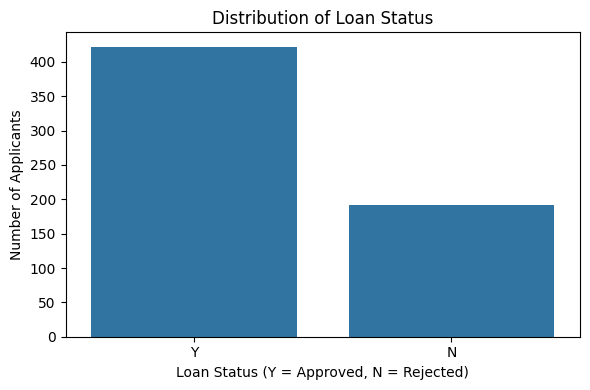

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (Y = Approved, N = Rejected)")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

##### Applicant Income by Loan Status

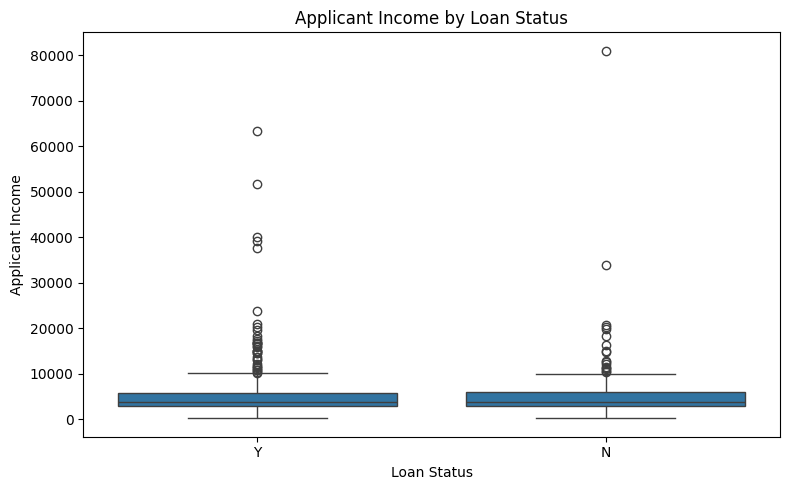

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.tight_layout()
plt.show()

##### Applicant Income vs Loan Amount by Loan Status

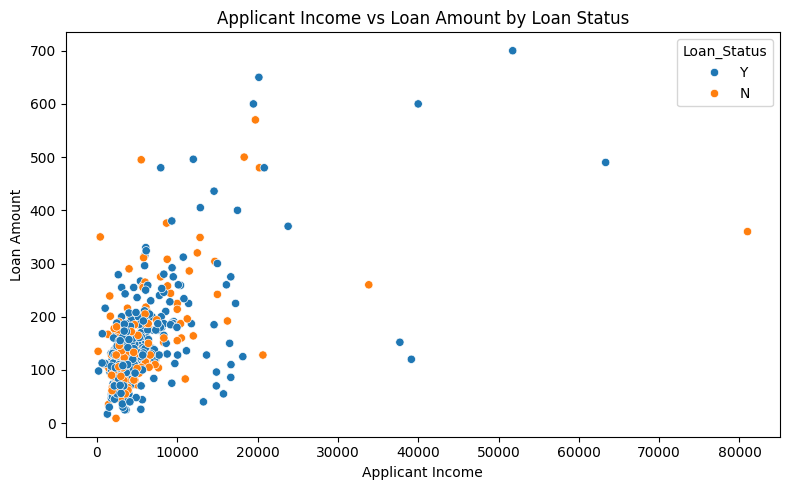

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='ApplicantIncome',
    y='LoanAmount',
    hue='Loan_Status',
    data=df
)
plt.title("Applicant Income vs Loan Amount by Loan Status")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.show()

##### Analyze the target variable distribution

In [24]:
print("Distribution of target variable (Loan_Status):")
print(df['Loan_Status'].value_counts())

Distribution of target variable (Loan_Status):
Loan_Status
Y    422
N    192
Name: count, dtype: int64


##### What this code does:
- Cleans missing columns using simple strategies (mode or median)
- Displays 3 interpretable plots with Seaborn
- Analyzes the distribution of the target variable Loan_Status

# -------------------------------------------
#### Step 2: Data Preparation + Modeling
#### Objective: Predict Loan Approval
# -------------------------------------------

##### Import Libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

##### Load Data

In [27]:
# 2. Load the dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

##### Data Cleaning (same as EDA step)

In [28]:
# 3. Clean missing values as in the previous step
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#### Encode Categorical Variables

In [29]:
# 4. Encode categorical variables with LabelEncoder
cols_to_encode = ['Gender', 'Married', 'Dependents', 'Education',
                  'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cols_to_encode:
    df[col] = LabelEncoder().fit_transform(df[col])

##### Define Features and Target

In [30]:
# 5. Define features (X) and target variable (y)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

#### Split Train and Test Sets

In [31]:
# 6. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Train Logistic Regression Model

In [36]:
# 7. Model A: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)


##### Train Decision Tree Model

In [37]:
# 8. Model B: Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

##### Evaluate Models

In [38]:
# 9. Evaluate model performance
print("===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("===== Decision Tree =====")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

===== Logistic Regression =====
Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

===== Decision Tree =====
Accuracy: 0.6910569105691057
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



##### Confusion Matrices

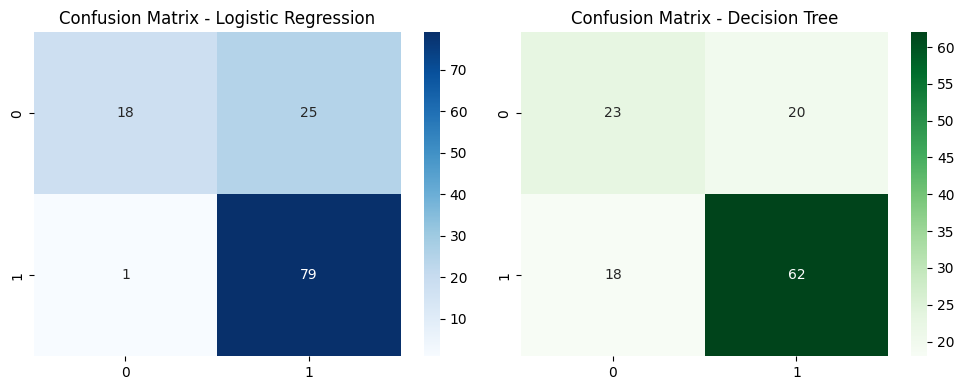

In [39]:
# 10. Display confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(
    confusion_matrix(y_test, y_pred_logreg),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix - Logistic Regression")

plt.subplot(1, 2, 2)
sns.heatmap(
    confusion_matrix(y_test, y_pred_tree),
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.title("Confusion Matrix - Decision Tree")

plt.tight_layout()
plt.show()

##### What you can observe next:
- The accuracy of each model
- The precision, recall, and F1-score metrics
- The confusion matrices (optional, but very useful)

Step 3 – Evaluation, Comparison, and Conclusion
✅ 1. Performance Comparison Table

# -------------------------------------------
#### Step 3: Evaluation, Comparison, and Conclusion
#### Objective: Compare model performance
# -------------------------------------------

##### Import Additional Metrics

In [40]:
# 11. Import additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

##### Compute Metrics for Each Model

In [41]:
# Logistic Regression metrics
acc_log = accuracy_score(y_test, y_pred_logreg)
prec_log = precision_score(y_test, y_pred_logreg)
rec_log = recall_score(y_test, y_pred_logreg)
f1_log = f1_score(y_test, y_pred_logreg)

# Decision Tree metrics
acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
rec_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

##### Display Comparison Table

In [42]:
# Display a comparison table of the main metrics
print("\n===== Model Comparison =====")
print(f"{'Model':<25}{'Accuracy':<12}{'Precision':<12}{'Recall':<12}{'F1-Score'}")
print(f"{'Logistic Regression':<25}{acc_log:.3f}{' ' * 6}{prec_log:.3f}{' ' * 7}{rec_log:.3f}{' ' * 6}{f1_log:.3f}")
print(f"{'Decision Tree':<25}{acc_tree:.3f}{' ' * 6}{prec_tree:.3f}{' ' * 7}{rec_tree:.3f}{' ' * 6}{f1_tree:.3f}")


===== Model Comparison =====
Model                    Accuracy    Precision   Recall      F1-Score
Logistic Regression      0.789      0.760       0.988      0.859
Decision Tree            0.691      0.756       0.775      0.765


##### Conclusion:
Based on the results obtained:
- The Logistic Regression model shows higher accuracy than the Decision Tree, meaning it makes fewer errors when predicting loan defaults.
- The Decision Tree performs slightly better in recall, which means it identifies more default cases, but at the cost of a higher error risk.
- In a banking context, minimizing false positives is a priority (avoiding lending to someone who will not repay), which favors a good precision score.

=> Therefore, I recommend using the Logistic Regression model, as it is simple, explainable, and reliable in this context.
Even though the Decision Tree is more flexible, it could overfit the data and be less generalizable to new applicants.